## AMAZON CUSTOMER DATA ANALYSIS

### In depth analysis of Amazon Customer Data is done based on a dataset containing the following information.

### The column or features in the dataset are:
     Id
     ProductId — unique identifier for the product
     UserId — unqiue identifier for the user
     ProfileName
     HelpfulnessNumerator — number of users who found the review helpful
     HelpfulnessDenominator — number of users who indicated whether they found the review helpful or not
     Score — rating between 1 and 5
     Time — timestamp for the review
     Summary — brief summary of the review
     Text — text of the review

#### The dataset contains 568455 rows and 10 columns and has a size of 286 MB.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [2]:
df=pd.read_csv('E:\Data Science\Data Analyst Projects\AmazonCustomerDataAnalysis\Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.shape

(568454, 10)

### Perform Sentiment Analysis

In [4]:
!pip install TextBlob
from textblob import TextBlob

In [5]:
text=df['Summary'][0]
text

'Good Quality Dog Food'

In [6]:
TextBlob(text).sentiment.polarity

0.7

In [7]:
# +1:positive sentiment, -1:negative sentiment, 0:neutral sentiment

polarity=[]  #blank list

for i in df['Summary']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)
        
#using try catch so that rows that do not have summary get caught in except block

In [8]:
len(polarity)

568454

In [9]:
data=df.copy()

In [10]:
data['Polarity']=polarity
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8


### EDA (Exploratory Data Analysis) for Positive Sentiments

In [11]:
data_positive=data[data['Polarity']>0]
data_positive.shape

(331665, 11)

In [12]:
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

In [13]:
stopwords=set(STOPWORDS)

In [14]:
data_positive.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.700000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.800000
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,0.600000
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,0.358333
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,1.000000


In [15]:
total_text=(' '.join(data_positive['Summary'])) #joining all data in summary columnn together as a paragraph separated by space 
len(total_text)

8465012

In [16]:
total_text[0:10000]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [17]:
import re #useful for cleaning/modifying text data
total_text=re.sub('[^a-zA-Z]',' ',total_text)
total_text[0:20000]
# useless symbols in the text are removed

'Good Quality Dog Food Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Love it  GREAT SWEET CANDY  Always fresh Delicious product  Great Bargain for the Price The Best Hot Sauce in the World Great machine  Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry  satisfying Love Gluten Free Oatmeal    GOOD WAY TO START THE DAY     Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns  Tastes great  Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT   And good   Came back for more     Roasts up a smooth brew Our guests love it  Awesome Deal  Awsome   Kids in neighborhood loved us  great deal  Better price for this at Target great source of electrolytes Great for preventing cramps Tast

In [18]:
#to remove extra space
total_text=re.sub(' +',' ',total_text) 
total_text[0:20000]

'Good Quality Dog Food Great taffy Nice Taffy Great Just as good as the expensive brands Wonderful tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this diet food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy Love it GREAT SWEET CANDY Always fresh Delicious product Great Bargain for the Price The Best Hot Sauce in the World Great machine Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry satisfying Love Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns Tastes great Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT And good Came back for more Roasts up a smooth brew Our guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Target great source of electrolytes Great for preventing cramps Taste is not so good How much would you

(-0.5, 999.5, 499.5, -0.5)

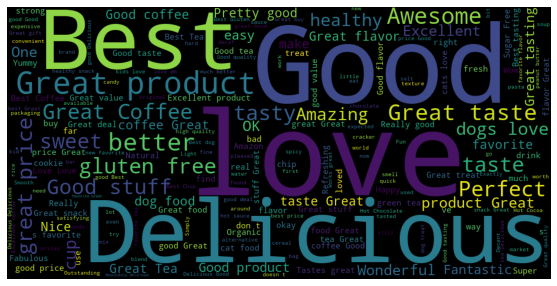

In [19]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text) #wordcloud is generated from total_text
plt.figure(figsize=(15,5)) 
plt.imshow(wordcloud) #displaying wordcloud using imshow function
plt.axis('off')

### Perform EDA for Negative Sentences

In [20]:
data_negative=data[data['Polarity']<0]
data_negative.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,-0.400
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",-1.000
57,58,B004N5KULM,ASCNNAJU6SXF8,S. Beck,1,1,5,1336176000,How can you go wrong!,"It is chocolate, what can I say. Great variet...",-0.625
61,62,B004N5KULM,A7ZK2A3VIW7X9,Peggy,0,2,5,1319414400,pretty expensive,"This bag of candy online is pretty expensive, ...",-0.125
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...,-0.500


In [21]:
total_text2=(' '.join(data_negative['Summary'])) 
total_text2[0:10000]

'poor taste Nasty No flavor How can you go wrong! pretty expensive stale product. Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS! Tasteless but low calorie Marley\'s Mellow Mood Lite - Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK!!!! Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don\'t Waste Your Money Disappointed! sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee... Fantastic Chicken Noodle soup Heinz no more! Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping. poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad b

In [22]:
total_text2=re.sub('[^a-zA-Z]',' ',total_text2)
total_text2[0:10000]

'poor taste Nasty No flavor How can you go wrong  pretty expensive stale product  Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS  Tasteless but low calorie Marley s Mellow Mood Lite   Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK     Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed  sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee    Fantastic Chicken Noodle soup Heinz no more  Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping  poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but

In [23]:
total_text2=re.sub(' +',' ',total_text2)
total_text2[0:10000]

'poor taste Nasty No flavor How can you go wrong pretty expensive stale product Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS Tasteless but low calorie Marley s Mellow Mood Lite Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee Fantastic Chicken Noodle soup Heinz no more Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but a little hard 

(-0.5, 999.5, 499.5, -0.5)

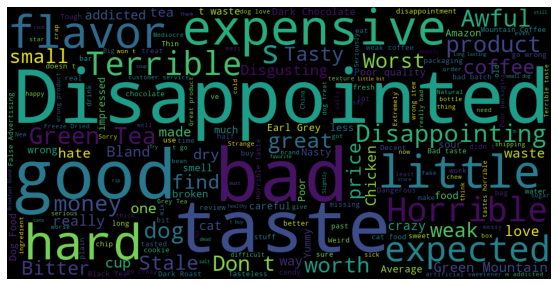

In [24]:
from wordcloud import WordCloud,STOPWORDS
wordcloud2=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text2) #wordcloud is generated from total_text
plt.figure(figsize=(15,5)) 
plt.imshow(wordcloud2) #displaying wordcloud using imshow function
plt.axis('off')

### Analyse, to what user Amazon can recommend more products?

#### Amazon will recommend more products to whose who have better conversion rate or buy more 

In [25]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [26]:
df['UserId'].nunique()

256059

In [27]:
raw=df.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='Text',ascending=False)
raw.columns=['no._of_summaries','no._of_text','avg_score','no._of_products_purchased']
raw

,no._of_summaries,no._of_text,avg_score,no._of_products_purchased
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
...,...,...,...,...
A2HROKQO0GA5AF,1,1,3.000000,1
A2HROR28DMJV2W,1,1,5.000000,1
A2HRR8CO2Y20G8,1,1,5.000000,1


In [28]:
user_10=raw.index[0:10]
products_10=raw['no._of_products_purchased'][0:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

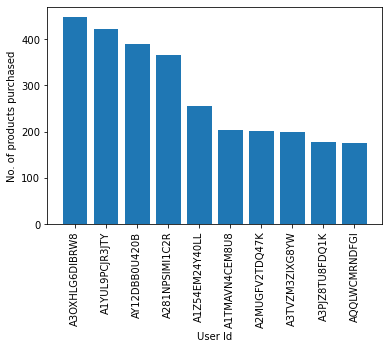

In [29]:
plt.bar(user_10,products_10,label='most recommended users')
plt.xlabel('User Id')
plt.ylabel('No. of products purchased')
plt.xticks(rotation='vertical')

#### Conclusion: Displayed above are our top 10 users to whom most products should be recommended as they are more likely to buy

### Analysing length of comments whether customers are going to give long or short comments

In [30]:
final=df[0:2000]
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [31]:
final.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [32]:
final.duplicated().sum()

0

In [33]:
final['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [34]:
final['Text'][0].split(' ')

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality.',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better.',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 '',
 'most.']

In [35]:
len(final['Text'][0].split(' '))

49

In [36]:
def calc_len(text):
    return len(text.split(' '))    

In [37]:
final['Text_length']=final['Text'].apply(calc_len)

<ipython-input-37-a7a52d29ef9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Text_length']=final['Text'].apply(calc_len)


!pip install plotly
import plotly.express as px
px.box(final,y='Text_length')

#### Conclusion:Median text length is 53 which means that Q2/quartile2/50% of the customers give feedback of len=53 q1=33,q3=90 while data above are outliers

### Analysing score

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='count'>

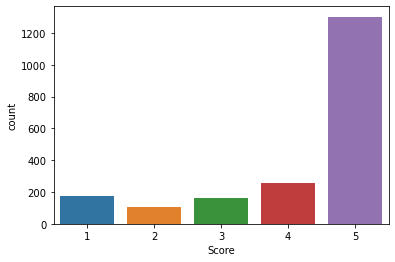

In [38]:
sns.countplot(final['Score'])

#### Conclusion: Most customers give rating of 5 on any of the product

### Analysing customer behaviour

In [39]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30


In [40]:
final['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [41]:
final['Text'].str.lower()

0       i have bought several of the vitality canned d...
1       product arrived labeled as jumbo salted peanut...
2       this is a confection that has been around a fe...
3       if you are looking for the secret ingredient i...
4       great taffy at a great price.  there was a wid...
                              ...                        
1995    i have to laugh at the reviews that said it wa...
1996    i had read some favorable reviews of this panc...
1997    i was expecting great things based on the revi...
1998    i love this pancake mix.  i bought my first ca...
1999    what can i say??  they are wonderful, and the ...
Name: Text, Length: 2000, dtype: object

In [42]:
final['Text_lower']=final['Text'].str.lower()

<ipython-input-42-0c522fae17be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Text_lower']=final['Text'].str.lower()


In [43]:
final['Text_lower'][164]

'seriously this product was as tasteless as they come. there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. you just have to season it or combine it with something else to share the flavor.'

In [44]:
re.sub('[^a-zA-Z]',' ',final['Text_lower'][164])

'seriously this product was as tasteless as they come  there are much better tasting products out there but at     calories its better than a special k bar or cookie snack pack  you just have to season it or combine it with something else to share the flavor '

In [45]:
punctuations='''!()[]{},.;:?/""\@-_#$%^&*'''
d=final['Text_lower'][164]
no_punc=''
for i in d:
    if i not in punctuations:
        no_punc=no_punc+i
    
no_punc

'seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

In [46]:
import string 
punctuations2=string.punctuation #returns all punctuation defined by python

def remove_punc(review): #whichever review is passed, the func will remove all punc from it 
    no_punc=''
    for i in review:
        if i not in punctuations2:
            no_punc=no_punc+i

    return no_punc

In [47]:
final['Text_lower']=final['Text_lower'].apply(remove_punc)
final.head()

<ipython-input-47-5af4c8cd3fe4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Text_lower']=final['Text_lower'].apply(remove_punc)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_length,Text_lower
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99,this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,43,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30,great taffy at a great price there was a wide...


In [48]:
!pip install nltk
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
d2=final['Text_lower'][164]
d2

'seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

In [50]:
re=[word for word in d2.split(' ') if word not in set(stopwords.words('english'))]

str=''
for wd in re:
    str=str+wd #adding words
    str=str+' ' #adding space
str 

'seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor '

In [51]:
def remove_stopwords(review):
    return ' '.join([word for word in review.split(' ') if word not in set(stopwords.words('english'))])
    

In [52]:
remove_stopwords(d2)

'seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor'

In [53]:
final['Text_lower']=final['Text_lower'].apply(remove_stopwords)

<ipython-input-53-3d50475cb3e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Text_lower']=final['Text_lower'].apply(remove_stopwords)


In [54]:
final['Text_lower'][45]

'seems little wholesome supermarket brands somewhat mushy doesnt quite much flavor either  didnt pass muster kids probably wont buy'

In [55]:
final['Text_lower'].str.contains('http').sum() 

35

In [56]:
pd.set_option('display.max_rows',2000)
final['Text_lower'].str.contains('http')

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21       True
22      False
23      False
24      False
25       True
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39       True
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [57]:
review=final['Text_lower'][21]
review

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price hrefhttpwwwamazoncomgpproductb001gvisjmtwizzlers strawberry 16ounce bags pack 6a'

In [58]:
import re
url_pattern=re.compile(r'href|http.\w+')
url_pattern.sub(r'',review)  

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price  strawberry 16ounce bags pack 6a'

In [59]:
def remove_urls(rev):
   url_pattern=re.compile(r'href|http.\w+')
   return url_pattern.sub(r'',rev)                          

In [60]:
final['Text_lower']=final['Text_lower'].apply(remove_urls)

<ipython-input-60-9cdcf4a5cecc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Text_lower']=final['Text_lower'].apply(remove_urls)


In [61]:
final['Text_lower'][25] #clean data

'product received advertisedbr br  strawberry 16ounce bags pack 6a'

In [62]:
final['Text_lower'].str.contains('http').sum()

0

In [63]:
final['Text_lower'][25].replace('br','') #replace br with blank

'product received advertised   strawberry 16ounce bags pack 6a'

In [64]:
for i in range(len(final['Text_lower'])):
    final['Text_lower'][i]=final['Text_lower'][i].replace('br','')

<ipython-input-64-a790ccfce7d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Text_lower'][i]=final['Text_lower'][i].replace('br','')
C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [65]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_length,Text_lower
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99,confection around centuries light pillowy cit...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,43,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30,great taffy great price wide assortment yummy...


In [66]:
comment_words=' '.join(final['Text_lower'])

(-0.5, 799.5, 799.5, -0.5)

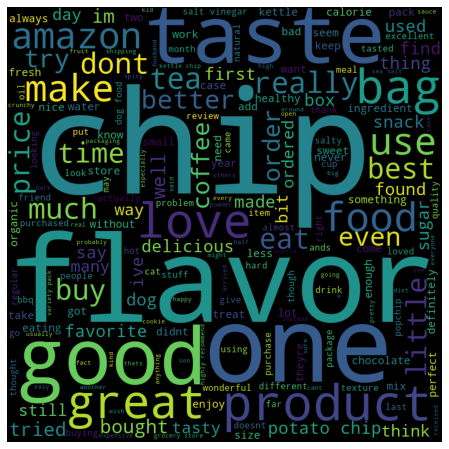

In [67]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 

wordcloud=WordCloud(width=800,height=800,stopwords=stopwords).generate(comment_words)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')

#### Conclusion: Customer will prefer these keywords most of the times which shows his behaviour